# Feature Engineering

이번 커널에서는 좋은 머신러닝 모델을 구축하는데 가장 중요한 스텝 중 하나인 'feature engineering'에 대해 배울 것이다. 내용은 아래와 같다.

- 어떤 feature가 가장 주요한 mutual information을 갖고 있는가
- <b> 파생변수를 만드는 방법 </b>
- high-cardinality를 가진 범주형 변수를 인코딩하는 방법
- <b> KMeans를 사용하여 segmentation feature를 만드는 방법 </b>
- PCA를 통한 방법

## 서론
여러 feature들 중에 유용해보이는 feature를 확인했다면, 이를 발전시켜야 한다. 이번 커널에서는 Pandas를 사용하여 간단한 feature engineering을 배워볼 것이다.

US  Traffic Accidents, 1985 Automobiles, Concrete Formulations, Customer Lifetime Value. 이렇게 총 4개의 데이터셋을 사용할 것이다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', 
       labelweight = 'bold', 
       labelsize = 'large', 
       titleweight = 'bold', 
       titlesize = 14, 
       titlepad = 10)

In [2]:
# 데이터 불러오기
autos = pd.read_csv('data/Automobile_data.csv')
concrete = pd.read_excel('data/Concrete_Data.xls')
customer = pd.read_csv('data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

### 수학적 변환 Mathematical Transforms

numerical feauture끼리의 관계는 종종 수학적인 식으로 나타낼 수 있다.

예를 들어 Automobile 데이터세트의 feature들은 차의 엔진을 나타낸다. 'stroke ratio'라는 파생변수를 생성한다. 이는 엔진의 효율성과 성능을 나타낼 수 있는 척도이다.

In [3]:
# unique 확인
print(autos['stroke'].unique())
print(autos['bore'].unique())

['2.68' '3.47' '3.4' '2.8' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46' '3.9'
 '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' '?' '3.16' '3.64' '3.1' '3.35'
 '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.9' '2.07' '2.36'
 '2.64' '3.08' '3.5' '3.54' '2.87']
['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']


In [4]:
# ? 를 결측치로 대체
autos['stroke'].replace('?', np.nan, inplace = True)
autos['bore'].replace('?', np.nan, inplace = True)
autos['num-of-cylinders'].replace({'four' : 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve': 20, 'two' : 2, 'eight' : 8}, inplace = True)

In [5]:
autos['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 20,  2,  8], dtype=int64)

In [6]:
autos['stroke'] = pd.to_numeric(autos['stroke'])
autos['bore'] = pd.to_numeric(autos['bore'])
autos['num-of-cylinders']  = pd.to_numeric(autos['num-of-cylinders'])

In [7]:
# 파생변수 생성
autos['stroke_ratio'] = autos['stroke'] / autos['bore']

autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [8]:
# 배기량이라는 파생변수 생성
autos['displacement'] = (np.pi * (( 0.5* autos['bore']) ** 2) * autos['stroke'] * autos['num-of-cylinders'])

autos[['bore', 'stroke', 'num-of-cylinders', 'displacement']].head()

,bore,stroke,num-of-cylinders,displacement
0,3.47,2.68,4,101.377976
1,3.47,2.68,4,101.377976
2,2.68,3.47,6,117.446531
3,3.19,3.40,4,108.695147
4,3.19,3.40,5,135.868934


<b> Count

In [9]:
# columns명 변경해주기
col = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age', 'ConcreteCompressiveStrength']

concrete.columns = col

In [10]:
# count
components = [ 'Cement', "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete['Components'] = concrete[components].gt(0).sum(axis = 1)

concrete[components + ['Components']].head(10) 

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


### Building-Up and Breaking-Down Features

아래와 같은 복잡한 str 타입의 feature를 가지고 있을 수도 있다.

- ID numbers: '123-45-6789'
- Phone numbers: '(999) 555-0123'
- Street addresses: '8241 Kaggle Ln., Goose City, NV'
- Internet addresses: 'http://www.kaggle.com'
- Product codes: '0 36000 29145 2'
- Dates and times: 'Mon Sep 30 07:06:05 2013'

이러한 feature들은 사용할 수 있는 비슷한 구조를 가지고 있는 경우가 있다. US phone number를 예로 하면 앞에 있는 '(999)'라는 코드는 지역번호를 의미한다. 

In [11]:
# split을 이용하여 Policy를 Type과  Level로 나눠 파생변수를 생성함
customer[['Type', 'Level']] = (customer['Policy'].str.split(' ', expand = True))

customer[['Policy', 'Type', 'Level']].head()

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1


split을 통해 나누는 것뿐만이 아닌 다른 변수를 합쳐서 새로운 파생변수를 생성할 수도 있다.

In [12]:
# make와 body-style을 합쳐서 차량 브랜드와 모델을 합친 make_and_style 생성
autos['make_and_style'] = autos['make'] + '_' + autos['body-style']
autos[['make', 'body-style', 'make_and_style']].head()

,make,body-style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


### 그룹 변환 Group Transforms

거주지의 평균 임금, 장르별 평일에 개봉되는 비율과 같은 group으로 묶어 새로운 변수를 만들 수 있다.

In [13]:
customer['AverageIncome'] = (customer.groupby('State')['Income'].transform('mean'))

customer[['State', 'Income', 'AverageIncome']].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [14]:
customer['StateFreq'] = (customer.groupby('State')['State'].transform('count') / customer['State'].count())

customer[['State', 'StateFreq']].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [15]:
df_train = customer.sample(frac = 0.5)
df_valid = customer.drop(df_train.index)

df_train['AverageClaim'] = df_train.groupby('Coverage')['Total Claim Amount'].transform('mean')

df_valid = df_valid.merge(df_train[['Coverage', 'AverageClaim']].drop_duplicates(), on = 'Coverage', how = 'left')

df_valid[['Coverage', 'AverageClaim']].head()

,Coverage,AverageClaim
0,Basic,380.940907
1,Extended,488.110651
2,Premium,659.990737
3,Basic,380.940907
4,Basic,380.940907


### Clustering with KMeans

이번 장에서는 비지도학습을 이용한 방법이다. 비지도 학습이라 하면 target feature를 사용하지 않는다. 대신에 데이터를 통해 학습하고, feature의 구조를 특정 방식으로 표현한다. 

예측을 위한 feature engineering 관점에서 본다면, 비지도 학습 알고리즘은 'feature discovery'라고 생각할 수도 있다.

In [16]:
# housing data를 통해 확인해보자
from sklearn.cluster import KMeans

df = pd.read_csv('data/housing.csv')
X = df.loc[:, ['median_income', 'latitude', 'longitude']]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


K-means 알고리즘은 스케일링에 예민하므로 정규화를 시켜주는 것은 좋은 아이디어다. 위 데이터는 이미 스케일링이 어느정도 되어있으므로 생략한다.

In [17]:
# KMeans 객체 생성
kmeans = KMeans(n_clusters=6)
X['cluster'] = kmeans.fit_predict(X)
X['cluster'] = X['cluster'].astype('category')

X.head()

,median_income,latitude,longitude,cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,3


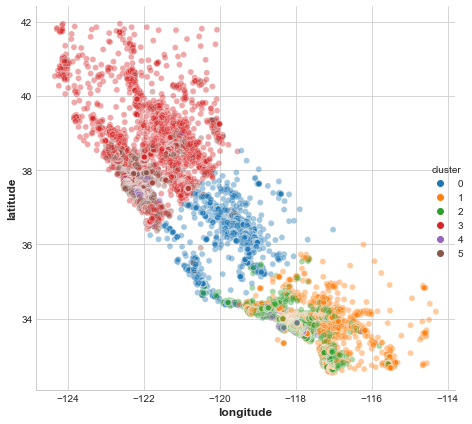

In [18]:
sns.relplot(x=  'longitude', y = 'latitude', hue = 'cluster', data = X, height = 6, alpha = .4)
plt.show()

raw 데이터에서 target을 임의로 median_house_value로 설정하자. 다음은 boxplot을 통해 cluster마다 어떤 차이를 보이는지 확인해보자. 만약 clustering이 유용하다면, cluster에 따라 boxplot이 다르게 그려질 것이다. 

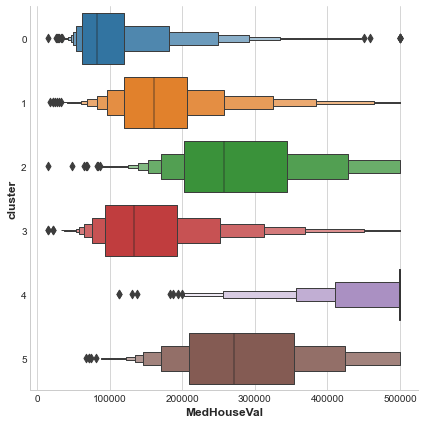

In [19]:
X['MedHouseVal'] =df['median_house_value']
sns.catplot(x = 'MedHouseVal', y = 'cluster', data = X, kind = 'boxen', height = 6)
plt.show()

In [20]:
# 이상치로 파악되는 cluster = 3
X.loc[X['cluster'] == 3].head()

,median_income,latitude,longitude,cluster,MedHouseVal
4,3.8462,37.85,-122.25,3,342200.0
5,4.0368,37.85,-122.25,3,269700.0
6,3.6591,37.84,-122.25,3,299200.0
7,3.1200,37.84,-122.25,3,241400.0
8,2.0804,37.84,-122.26,3,226700.0
